# Introduction

Drafting in Magic: The Gathering (MTG) is a complex and dynamic format that challenges players to adapt quickly, make strategic decisions, and understand the evolving meta of each new set. In this analysis, we explore the summary and draft data for Bloomburrow, focusing on draft-level insights without diving into individual cards. We use data from Bloomburrow Premier Drafts, recorded from the [17Lands](17lands.com) user base in MTG Arena, a best-of-one draft format where players draft in a pool and play until they win 7 games or lose 3. The Bloomburrow set was released in Arena on July 30, 2024.

By examining deck performance, player strategies, and various in-game factors such as mulligans and turn counts, we aim to uncover the key elements that contribute to success in this draft environment. We’ll explore how factors like deck choice, player rank, sideboarding, and the number of turns impact win rates. Additionally, we’ll investigate gameplay differences when players go first versus second and highlight how player behavior evolves throughout a ranked season. Through this analysis, we provide valuable insights to help both seasoned and new drafters make more strategic decisions in the Bloomburrow draft format and beyond.

To see other analyses of MTG draft data, check out the [Draft Analysis](00-intro.ipynb) page.


In [1]:
# | output: false
# Setup Notebook

import os


if os.path.basename(os.getcwd()) != "mtg-modeling":

    get_ipython().run_line_magic("run", '-i "../../scripts/notebook_header.py"')  # type: ignore

Changed working directory to: d:\mtg-modeling


In [2]:
import pandas as pd
from tqdm.notebook import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import to_rgba, to_hex
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import time
import polars as pl
from datetime import datetime, timedelta
from PIL import Image

In [3]:
import src.plots.annotate as anno
import src.plots.symbols as symbols

In [4]:
SET_CODE = "BLB"

paths = {
    "processed": Path("data/processed/17lands/game_data/premier_draft"),
}
summary_file = paths["processed"] / f"{SET_CODE}_Game_PD_Summary.parquet"
game_file = paths["processed"] / f"{SET_CODE}_Game_PD_Games.parquet"
draft_file = paths["processed"] / f"{SET_CODE}_Game_PD_Drafts.parquet"
card_file = paths["processed"] / f"{SET_CODE}_Game_PD_Cards.parquet"

# Summary Data

Here we summarize key statistics from the data, reflecting the experiences of 17Lands players.

- Date Span: 2024-07-30 - 2024-08-18.
- Win Rate: 54.7%
- Mean Turns per Game: 8.9
- Total Drafts: 117,000
- Total Games: 680,000
- Mean Games per Draft: 5.8


In [10]:
df_cards = pl.scan_parquet(card_file)



df_cards.head().collect()

draft_id,match_number,game_number,build_index,opening_hand_Forest,drawn_Forest,tutored_Forest,deck_Forest,sideboard_Forest,opening_hand_Island,drawn_Island,tutored_Island,deck_Island,sideboard_Island,opening_hand_Mountain,drawn_Mountain,tutored_Mountain,deck_Mountain,sideboard_Mountain,opening_hand_Plains,drawn_Plains,tutored_Plains,deck_Plains,sideboard_Plains,opening_hand_Swamp,drawn_Swamp,tutored_Swamp,deck_Swamp,sideboard_Swamp,opening_hand_Agate Assault,drawn_Agate Assault,tutored_Agate Assault,deck_Agate Assault,sideboard_Agate Assault,opening_hand_Agate-Blade Assassin,drawn_Agate-Blade Assassin,tutored_Agate-Blade Assassin,…,deck_Whiskerquill Scribe,sideboard_Whiskerquill Scribe,opening_hand_Whiskervale Forerunner,drawn_Whiskervale Forerunner,tutored_Whiskervale Forerunner,deck_Whiskervale Forerunner,sideboard_Whiskervale Forerunner,opening_hand_Wick's Patrol,drawn_Wick's Patrol,tutored_Wick's Patrol,deck_Wick's Patrol,sideboard_Wick's Patrol,"opening_hand_Wick, the Whorled Mind","drawn_Wick, the Whorled Mind","tutored_Wick, the Whorled Mind","deck_Wick, the Whorled Mind","sideboard_Wick, the Whorled Mind",opening_hand_Wildfire Howl,drawn_Wildfire Howl,tutored_Wildfire Howl,deck_Wildfire Howl,sideboard_Wildfire Howl,opening_hand_Wishing Well,drawn_Wishing Well,tutored_Wishing Well,deck_Wishing Well,sideboard_Wishing Well,"opening_hand_Ygra, Eater of All","drawn_Ygra, Eater of All","tutored_Ygra, Eater of All","deck_Ygra, Eater of All","sideboard_Ygra, Eater of All","opening_hand_Zoraline, Cosmos Caller","drawn_Zoraline, Cosmos Caller","tutored_Zoraline, Cosmos Caller","deck_Zoraline, Cosmos Caller","sideboard_Zoraline, Cosmos Caller"
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",1,1,0,2,1,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,8,0,0,0,0,0,0,0,0,0,…,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",2,1,0,3,1,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,8,0,0,0,0,0,0,0,0,0,…,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",3,1,0,2,3,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,0,0,0,0,0,0,0,…,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",4,1,0,1,3,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,8,0,0,0,0,0,0,0,0,0,…,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",5,1,0,3,2,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,8,0,0,0,0,0,0,0,0,0,…,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
cols = df_cards.collect_schema().names()
id_cols = ["draft_id", "match_number", "game_number", "build_index"]
draft_cols = [*id_cols, "won"]
opening_cols = [col for col in cols if col.startswith("opening_hand")]

In [30]:
df_game = pl.scan_parquet(game_file)
df_game_lean = df_game.select(draft_cols)
df_game_lean.head().collect()

draft_id,match_number,game_number,build_index,won
str,i64,i64,i64,bool
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",1,1,0,true
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",2,1,0,true
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",3,1,0,false
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",4,1,0,true
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",5,1,0,false


In [27]:
short_cols = {col: col.replace("opening_hand_", "") for col in cols}
df_opening = df_game_lean.join(
    df_cards.select(*id_cols, *opening_cols), on=id_cols
).rename(short_cols)
df_opening.head().collect()

draft_id,match_number,game_number,build_index,won,Forest,Island,Mountain,Plains,Swamp,Agate Assault,Agate-Blade Assassin,Alania's Pathmaker,"Alania, Divergent Storm",Artist's Talent,Azure Beastbinder,Bakersbane Duo,Bandit's Talent,Banishing Light,Bark-Knuckle Boxer,Barkform Harvester,"Baylen, the Haymaker",Bellowing Crier,"Beza, the Bounding Spring",Blacksmith's Talent,Blooming Blast,Bonebind Orator,Bonecache Overseer,Brambleguard Captain,Brambleguard Veteran,Brave-Kin Duo,Brazen Collector,Brightblade Stoat,Builder's Talent,Bumbleflower's Sharepot,Burrowguard Mentor,Bushy Bodyguard,…,Thornvault Forager,Thought Shucker,Thought-Stalker Warlock,Three Tree City,Three Tree Mascot,Three Tree Rootweaver,Three Tree Scribe,Thundertrap Trainer,Tidecaller Mentor,"Toski, Bearer of Secrets",Treeguard Duo,Treetop Sentries,Uncharted Haven,Valley Flamecaller,Valley Floodcaller,Valley Mightcaller,Valley Questcaller,Valley Rally,Valley Rotcaller,Veteran Guardmouse,Vinereap Mentor,"Vren, the Relentless",Wandertale Mentor,War Squeak,Warren Elder,Warren Warleader,Waterspout Warden,Wax-Wane Witness,Wear Down,Whiskerquill Scribe,Whiskervale Forerunner,Wick's Patrol,"Wick, the Whorled Mind",Wildfire Howl,Wishing Well,"Ygra, Eater of All","Zoraline, Cosmos Caller"
str,i64,i64,i64,bool,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",1,1,0,true,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",2,1,0,true,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",3,1,0,false,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",4,1,0,true,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",5,1,0,false,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df_tall = df_opening.unpivot(
    index=draft_cols, variable_name="card", value_name="counts"
)
df_tall.head().collect()

draft_id,match_number,game_number,build_index,won,card,counts
str,i64,i64,i64,bool,str,i64
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",1,1,0,true,"""Forest""",2
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",2,1,0,true,"""Forest""",3
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",3,1,0,false,"""Forest""",2
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",4,1,0,true,"""Forest""",1
"""deaa4cdcd3e84d8e8b5a0ea34a0f9d…",5,1,0,false,"""Forest""",3


In [7]:
df_draft = pl.scan_parquet(draft_file)

# Color Decks

We will explore the use and importance of colors in draft decks. We will look at the frequency of color sets in decks, the win rates of color sets, and the win rates of color pairs.

## Color Frequency

We start by examining the frequency of decks drafted for each color combination in @fig-n-color-frequency. The ten two-color decks are the most common, aligning with the design intent of Bloomburrow, which focuses on ten two-color animal tribes. Mono-color and multi-color decks are far less common.


In [8]:
colors = (
    df_draft.group_by("main_colors")
    .agg(pl.col("n_games").count().alias("len"))
    .sort(by="len", descending=True)
    .collect()
)
colors = colors.to_pandas()
colors["Number of Main Colors"] = colors["main_colors"].str.len()
colors["pct_splash"] = colors["len"] / colors["len"].sum()
colors = colors.sort_values(["Number of Main Colors", "len"], ascending=[True, False])

colors_ct = (
    colors.groupby("Number of Main Colors")
    .sum()
    .reset_index(drop=False)
    .sort_values(["Number of Main Colors"], ascending=[True])
)

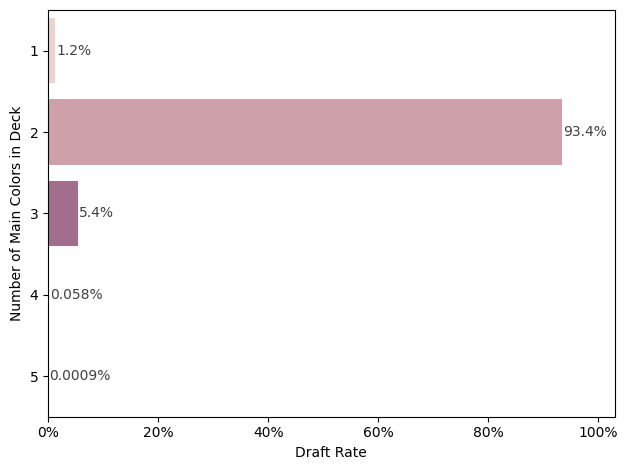

In [9]:
# | label: fig-n-color-frequency
# | fig-cap: "The rate at which the drafted deck has a given number of main colors."

sns.barplot(
    data=colors_ct,
    x="pct_splash",
    y="Number of Main Colors",
    hue="Number of Main Colors",
    orient="h",
    legend=False,
)

anno.annotate_bars()
anno.set_labels_to_percent()
anno.set_axis_labels_and_show(
    xlabel="Draft Rate", ylabel="Number of Main Colors in Deck"
)

Since Bloomburrow is designed with 2-color tribal decks in mind, we'll focus on these pairings. In @fig-n-two-color-frequency, we see the most frequent drafted decks are Black-Green, White-Green, and Red-White. On the other hand, the least drafted are Blue-Black, Blue-Red and White-Blue.


In [10]:
colors["use_rate"] = colors["len"] / colors["len"].sum()
colors = colors.sort_values("use_rate", ascending=False)

two_colors = colors[colors["main_colors"].str.len() == 2]

use_rate_mu = two_colors["use_rate"].mean()

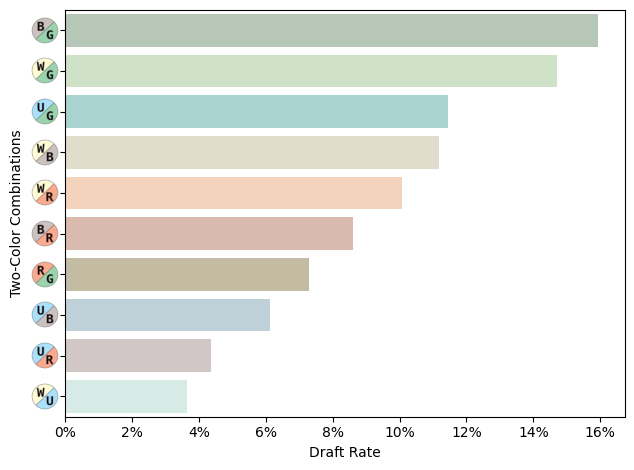

In [11]:
# | label: fig-n-two-color-frequency
# | fig-cap: "The rate at which the drafted deck is a given 2-color pair."

fig, ax = plt.subplots()
sns.barplot(
    data=two_colors,
    x="use_rate",
    y="main_colors",
    hue="main_colors",
    palette=color_palette,
    ax=ax,
)

symbols.add_tick_symbols()
anno.set_labels_to_percent()
anno.set_axis_labels_and_show(xlabel="Draft Rate", ylabel="Two-Color Combinations")

@fig-component-color-frequency shows the color composition of the decks. Green stands out as the most frequently drafted color, with Black and White also being popular choices. In contrast, Red and Blue are drafted far less frequently.

The average draft use rate per component color is 40.0%.


In [12]:
for color in ["W", "U", "B", "R", "G"]:
    colors[color] = colors["main_colors"].apply(lambda x: True if color in x else False)

dfs = []
for color in ["W", "U", "B", "R", "G"]:
    sums = colors[["len", color]].groupby(color).sum()
    use_rate = (sums.loc[True] / sums.sum()).values[0]
    dfs.append(pd.DataFrame({"color": color, "use_rate": use_rate}, index=[0]))
df = pd.concat(dfs).sort_values("use_rate", ascending=False).reset_index(drop=True)

use_rate_mu = df["use_rate"].mean()

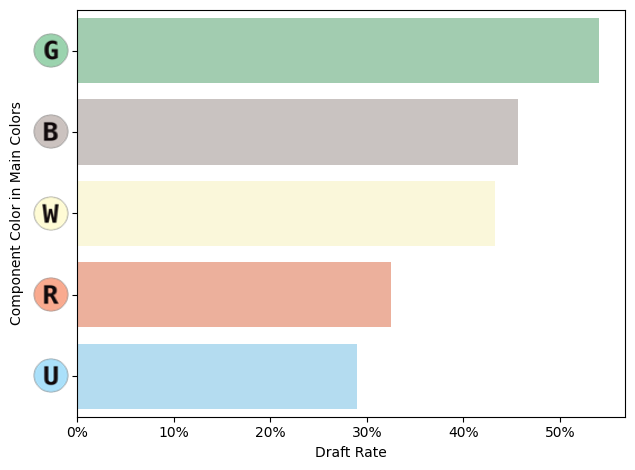

In [13]:
# | label: fig-component-color-frequency
# | fig-cap: "The rate at which the drafted deck contains a given color in the main deck colors."

fig, ax = plt.subplots()
sns.barplot(data=df, x="use_rate", y="color", hue="color", palette=color_palette, ax=ax)

symbols.add_tick_symbols(scale=0.5)
anno.set_labels_to_percent()
anno.set_axis_labels_and_show(
    xlabel="Draft Rate", ylabel="Component Color in Main Colors"
)

Next, we examine the four decks with the largest absolute changes in use between the start and end of the time period, shown in @fig-color-freq-over-time. The White-Green (WG) and White-Black (WB) decks exhibit the largest increases in use, while the Blue-Red (UR) and White-Red (WR) decks show the most significant decreases.


In [14]:
color_time = (
    (
        df_draft.filter(
            pl.col("main_colors").str.len_chars() == 2,
        )
        .group_by(pl.col("draft_time").dt.truncate("3d"), pl.col("main_colors"))
        .agg(
            pl.col("n_games").sum(),
            pl.col("n_wins").sum(),
        )
        .sort(by=["draft_time", "n_games"], descending=[False, True])
    )
    .with_columns(pl.col("draft_time") + timedelta(days=2))
    .collect()
    .to_pandas()
)

rank_time_sum = (
    color_time[["draft_time", "n_games"]].groupby(["draft_time"]).sum().reset_index()
)

color_time = color_time.merge(rank_time_sum, on="draft_time", suffixes=("", "_sum"))
color_time["rank_pct"] = color_time["n_games"] / color_time["n_games_sum"]

color_time_mean = (
    color_time[["draft_time", "n_wins", "n_games"]]
    .groupby("draft_time")
    .sum()
    .reset_index()
)
color_time_mean["win_rate"] = color_time_mean["n_wins"] / color_time_mean["n_games"]

end_mask = color_time["draft_time"] == color_time["draft_time"].max()
end_time = color_time.loc[end_mask]

start_mask = color_time["draft_time"] == color_time["draft_time"].min()
start_time = color_time.loc[start_mask]

diff_time = end_time.merge(start_time, on="main_colors", suffixes=("_end", "_start"))
diff_time["rank_diff"] = diff_time["rank_pct_start"] - diff_time["rank_pct_end"]
diff_time["abs_rank_diff"] = diff_time["rank_diff"].abs()
diff_time = diff_time.sort_values("abs_rank_diff", ascending=False)
diff_time[["abs_rank_diff", "main_colors"]]

color_decks = diff_time["main_colors"].head(4).to_list()
color_time = color_time.loc[color_time["main_colors"].isin(color_decks)]

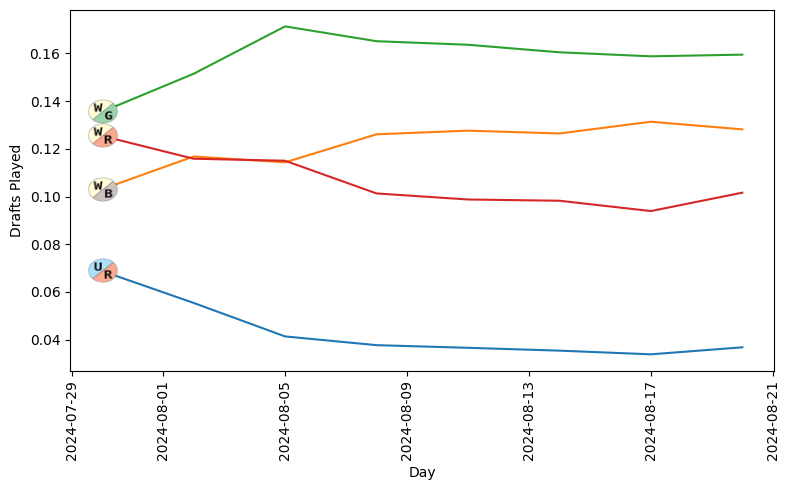

In [15]:
# | label: fig-color-freq-over-time
# | fig-cap: >
# |     Frequency of Drafted Decks by Two-Color Pair: This figure shows the rate at which
# |     different two-color pairs are drafted, highlighting trends and preferences in deck selection
# |     over time.

plt.subplots(figsize=(8, 5))
sns.lineplot(
    data=color_time,
    x="draft_time",
    y="rank_pct",
    hue="main_colors",
    hue_order=color_decks,
    legend=False,
)

symbols.add_timeseries_symbols(
    data=color_time,
    x_col="draft_time",
    y_col="rank_pct",
    label_col="main_colors",
    loc=pd.to_datetime("2024-07-30"),
)
anno.set_axis_labels_and_show(xlabel="Day", ylabel="Drafts Played", rot_x=True)

## Color Win Rates

In addition to analyzing the use rates of the colors, we'll also examine their win rates. First, we calculate the weighted average win rate, which is 54.7%. As highlighted in the summary section, this win rate suggests that the 17Lands player base performs better than the general draft player base.

@fig-n-color-wins presents the win rates for each color combination. While some mono-color decks have notably high win rates, their low use rates suggest that these results may be circumstantial due to small sample sizes.


In [74]:
mean_win_rate = df_summary.collect().to_pandas()["win_rate"].values[0]
# print(f"Average Win Percentage: {mean_win_rate:0.2%}")

In [17]:
color_wins = (
    df_draft.group_by("main_colors")
    .agg(
        pl.col("n_games").sum(),
        pl.col("n_wins").sum(),
        pl.col("n_losses").sum(),
    )
    .sort(by="n_games", descending=True)
    .collect()
)
color_wins = color_wins.to_pandas()
color_wins["Number of Main Colors"] = color_wins["main_colors"].str.len()
color_wins["win_rate"] = color_wins["n_wins"] / color_wins["n_games"]
color_wins["loss_rate"] = color_wins["n_losses"] / color_wins["n_games"]
color_wins = color_wins.sort_values(
    ["Number of Main Colors", "win_rate"], ascending=[True, False]
)

color_wins_ct = (
    color_wins.groupby("Number of Main Colors")
    .sum()
    .reset_index(drop=False)
    .sort_values(["Number of Main Colors"], ascending=[True])
)
color_wins_ct["win_rate"] = color_wins_ct["n_wins"] / color_wins_ct["n_games"]
color_wins_ct["loss_rate"] = color_wins_ct["n_losses"] / color_wins_ct["n_games"]

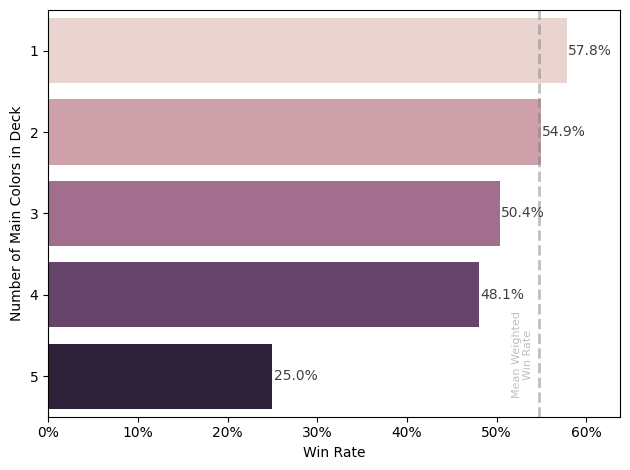

In [18]:
# | label: fig-n-color-wins
# | fig-cap: "The rate at which the drafted deck is a given 2-color pair."

sns.barplot(
    data=color_wins_ct,
    x="win_rate",
    y="Number of Main Colors",
    hue="Number of Main Colors",
    orient="h",
    legend=False,
)

anno.plot_vert_line(x=mean_win_rate, label="Mean Weighted\nWin Rate", offset=-0.03)
anno.annotate_bars()
anno.set_labels_to_percent()
anno.set_axis_labels_and_show(xlabel="Win Rate", ylabel="Number of Main Colors in Deck")

In @fig-n-two-color-wins, we focus on the 2-color decks. The Black-Red Lizards: Opponents Lose Life deck boasts the highest win rate, though it has a relatively low use rate. Meanwhile, the White-Red Rabbits: Go-Wide and Black-Green Squirrels: Forage decks are the most popular and also maintain high win rates.


In [19]:
color_mask = color_wins["main_colors"].str.len() == 2
two_color_wins = (
    color_wins.loc[color_mask]
    .sort_values("win_rate", ascending=False)
    .reset_index(drop=True)
)

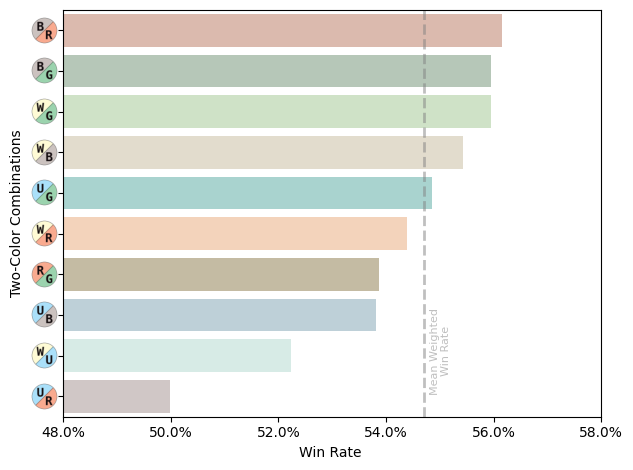

In [20]:
# | label: fig-n-two-color-wins
# | fig-cap: "The win rate for each 2-color pair."

sns.barplot(
    data=two_color_wins,
    x="win_rate",
    y="main_colors",
    hue="main_colors",
    palette=color_palette,
)
plt.gca().set(xlim=(0.48, 0.58))

anno.plot_vert_line(x=mean_win_rate, label="Mean Weighted\nWin Rate", offset=0.03)
symbols.add_tick_symbols()
anno.set_labels_to_percent()
anno.set_axis_labels_and_show(xlabel="Win Rate ", ylabel="Two-Color Combinations")

@fig-component-color-wins shows the win rates for the five primary colors, based on whether they serve as a main component in a deck. For example, the "B" results reflect the win rates for Black in decks such as WB, BG, Mono-Black, and UBR.

The overall average win rate for the data is 54.7%. Decks featuring Black perform the best, achieving a 55.2% win rate. Green and White decks also perform well, with win rates of 55.0% and 54.8%, respectively. On the other hand, decks with Red and Blue underperform, with win rates of 53.8% and 53.2%.


In [21]:
for color in ["W", "U", "B", "R", "G"]:
    color_wins[color] = color_wins["main_colors"].apply(
        lambda x: True if color in x else False
    )

dfs = []

for color in ["W", "U", "B", "R", "G"]:
    agg = color_wins.groupby(color).sum()
    agg["win_rate"] = agg["n_wins"] / agg["n_games"]
    dfs.append(
        pd.DataFrame(
            {"component_color": color, "win_rate": agg.loc[True, "win_rate"]}, index=[0]
        )
    )

df = pd.concat(dfs)
df = df.sort_values("win_rate", ascending=False).reset_index(drop=True)

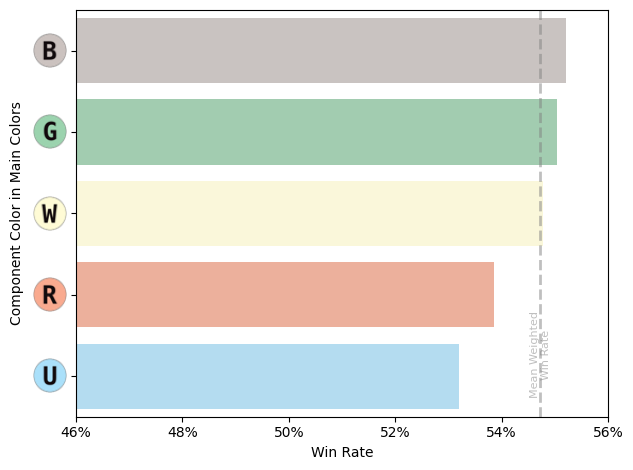

In [22]:
# | label: fig-component-color-wins
# | fig-cap: "The win rate for each given color in the main deck colors."

sns.barplot(
    data=df,
    x="win_rate",
    y="component_color",
    hue="component_color",
    palette=color_palette,
)
plt.gca().set(xlim=(0.46, 0.56))

symbols.add_tick_symbols(scale=0.5)
anno.plot_vert_line(x=mean_win_rate, label="Mean Weighted\nWin Rate", offset=0.0016)
anno.set_labels_to_percent(precision=1)
anno.set_axis_labels_and_show(
    xlabel="Win Rate", ylabel="Component Color in Main Colors"
)

## Win Rate over Time

It’s also insightful to observe how the win rates for two-color decks evolve over time. I selected the four decks with the largest absolute changes in win rate between the start and end of the period. In @fig-color-wins-over-time, we see that the White-Red (WR), White-Black (WB), and another White-Red (WR) deck start with high win rates but gradually decline over time. Conversely, the Blue-Red (UR) deck begins with a low win rate but shows an upward trend as time progresses.


In [23]:
color_time = (
    (
        df_draft.filter(
            pl.col("main_colors").str.len_chars() == 2,
        )
        .group_by(pl.col("draft_time").dt.truncate("7d"), pl.col("main_colors"))
        .agg(
            pl.col("n_games").sum(),
            pl.col("n_wins").sum(),
        )
        .sort(by=["draft_time", "n_games"], descending=[False, True])
    )
    .with_columns(pl.col("draft_time") + timedelta(days=5))
    .collect()
    .to_pandas()
)

color_time["win_rate"] = color_time["n_wins"] / color_time["n_games"]

color_time_mean = (
    color_time[["draft_time", "n_wins", "n_games"]]
    .groupby("draft_time")
    .sum()
    .reset_index()
)
color_time_mean["win_rate"] = color_time_mean["n_wins"] / color_time_mean["n_games"]

color_decks = diff_time["main_colors"].head(4).to_list()
color_time = color_time.loc[color_time["main_colors"].isin(color_decks)]

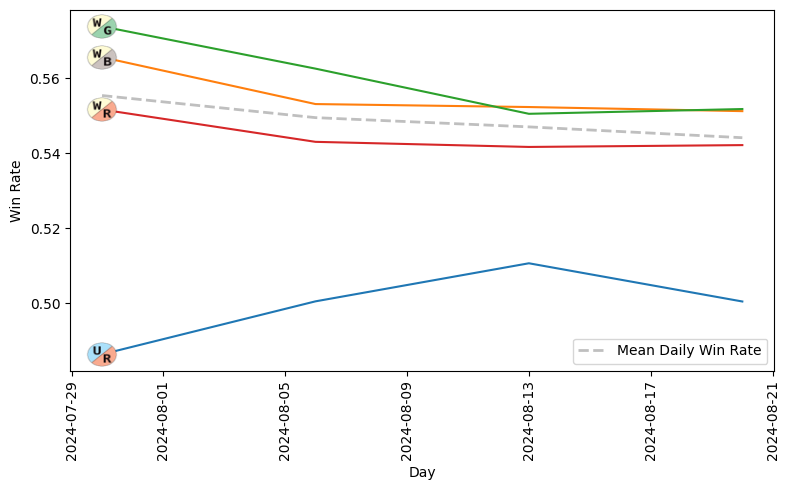

In [24]:
# | label: fig-color-wins-over-time
# | fig-cap: >
#   Win Rates of Drafted Decks by Two-Color Pair: This figure shows the win rate of
#   different two-color pairs, highlighting trends and preferences in deck performance
#   over time.

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=color_time,
    x="draft_time",
    y="win_rate",
    hue="main_colors",
    hue_order=color_decks,
    legend=False,
)

symbols.add_timeseries_symbols(
    data=color_time,
    x_col="draft_time",
    y_col="win_rate",
    label_col="main_colors",
    loc=pd.to_datetime("2024-07-30"),
)

plt.plot(
    color_time_mean["draft_time"],
    color_time_mean["win_rate"],
    label="Mean Daily Win Rate",
    color="gray",
    linestyle="--",
    linewidth=2,
    alpha=0.5,
)

plt.legend(loc="lower right")
anno.set_axis_labels_and_show(xlabel="Day", ylabel="Win Rate", rot_x=True)

## Color Freq vs Win Rate

Next, let’s compare the use rate to the win rate to see if the player base is well-calibrated in their deck selections based on performance.

In @fig-wins-vs-freq-2color, we observe that most of the two-color decks align along a straight line, indicating a balanced relationship between use rate and win rate, with two notable outliers. The Blue-Red Otters: Non-creature Spells deck underperforms relative to its use rate, suggesting it may be over-selected. In contrast, the Black-Red Lizards: Opponents Lose Life deck is a hidden gem, boasting the highest win rates but being picked less frequently than the average two-color deck.

This under-selection of Black-Red likely stems from the general underperformance of Red, leading many drafters to avoid it unless they secure strong Black-Red cards early. On the other hand, White, Green, and Black perform well, making the BG, WG, and WB decks popular and flexible choices that players can easily pivot to during drafts.


In [25]:
paired_df = color_wins[
    ["main_colors", "win_rate", "loss_rate", "Number of Main Colors"]
]
colors["use_rate"] = colors["len"] / colors["len"].sum()
select_colors = colors[["main_colors", "use_rate"]]
paired_df = paired_df.merge(select_colors, on="main_colors")

color_mask = paired_df["Number of Main Colors"] == 2
paired_filtered_df = paired_df.loc[color_mask].reset_index(drop=True)

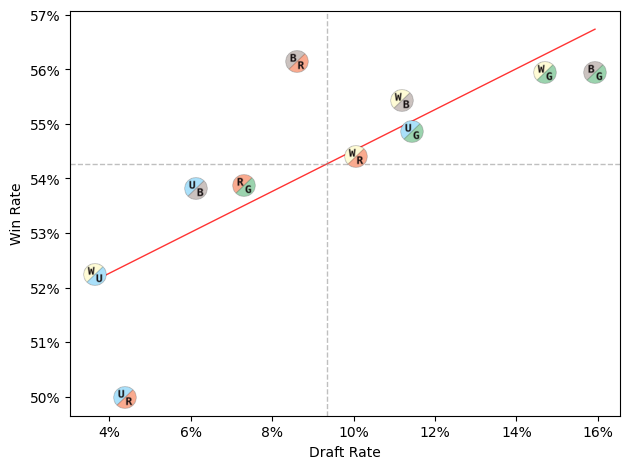

In [26]:
# | label: fig-wins-vs-freq-2color
# | fig-cap: "Win Rate vs Use Rate of 2-Color Draft Decks"

sns.regplot(
    data=paired_filtered_df,
    x="use_rate",
    y="win_rate",
    scatter=True,
    ci=None,
    line_kws={"color": "red", "linewidth": 1, "alpha": 0.8},
)

symbols.add_plot_symbols(
    data=paired_filtered_df,
    x_col="use_rate",
    y_col="win_rate",
    label_col="main_colors",
)

use_rate_mu = paired_filtered_df["use_rate"].mean()
win_rate_mu = paired_filtered_df["win_rate"].mean()
plt.axvline(use_rate_mu, color="gray", linestyle="--", linewidth=1, alpha=0.5)
plt.axhline(win_rate_mu, color="gray", linestyle="--", linewidth=1, alpha=0.5)

anno.set_labels_to_percent(axis="xy")
anno.set_axis_labels_and_show(xlabel="Draft Rate", ylabel="Win Rate")

## Wedges vs Shards

Magic: The Gathering color theory includes five wedges and five shards. Wedges are three-color decks built around a primary color and its two allies, while shards consist of a primary color and its two enemies. Conventional wisdom suggests that wedges are generally easier to draft than shards.

However, as shown in @fig-wedge-vs-shards, the shards have a slightly higher win rate and use rate compared to the wedges. This finding is somewhat unexpected but the difference is minimal.


In [27]:
wedges = ["WUG", "WUB", "WRG", "UBR", "BRG"]
shards = ["WUR", "WBG", "UBG", "URG", "WBR"]

color_wins["3_type"] = None
color_wins.loc[color_wins["main_colors"].isin(wedges), "3_type"] = "Wedge"
color_wins.loc[color_wins["main_colors"].isin(shards), "3_type"] = "Shards"
three_color_wins = color_wins.loc[color_wins["3_type"].notnull()]
three_color_wins = three_color_wins.groupby("3_type").sum()
three_color_wins["win_rate"] = three_color_wins["n_wins"] / three_color_wins["n_games"]

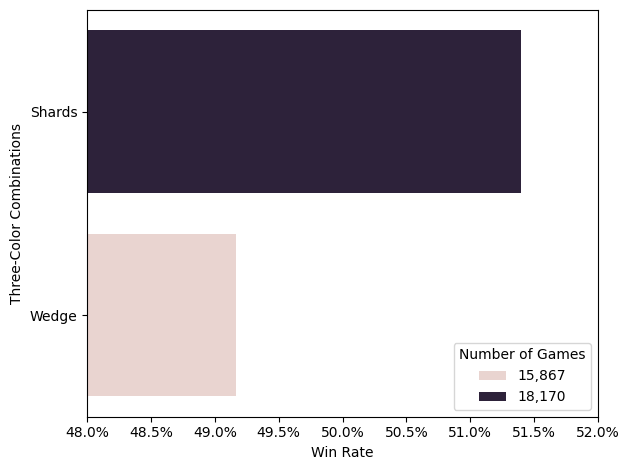

In [28]:
# | label: fig-wedge-vs-shards
# | fig-cap: "The win rate for shards versus wedges."


sns.barplot(
    data=three_color_wins,
    x="win_rate",
    y=three_color_wins.index,
    hue="n_games",
)
plt.gca().set(xlim=(0.48, 0.52))

anno.set_labels_to_percent()
anno.set_axis_labels_and_show(
    xlabel="Win Rate",
    ylabel="Three-Color Combinations",
    legend=True,
    legend_format=",.0f",
    legend_title="Number of Games",
)

# Opposing Player Colors

We also have data on the opposing player colors, which helps us understand the draft meta. For each draft color combination, we compare the use rate of 17Lands players with that of their opponents. Each combination is color-coded to indicate whether its win rate is above or below the average win rate of the 17Lands player base. A diagonal grey line is included to show parity between the use rates of 17Lands players and the general player base.

In @fig-player-vs-opp-freq-2color, we focus on the two-color drafts. The data reveals that White-Green (WG), Black-Green (BG), and Blue-Green (UG) decks are more favored by 17Lands players and also boast higher win rates. Conversely, the Blue-Black (UB) deck is favored but has a significantly lower win rate. The other color pairs show parity between the two player bases.


In [29]:
opp_colors = (
    df_draft.group_by("opp_colors")
    .len()
    .sort(by="len", descending=True)
    .collect()
    .to_pandas()
)

opp_colors["opp_use_rate"] = opp_colors["len"] / opp_colors["len"].sum()
opp_colors = opp_colors.rename(columns=({"len": "opp_len"}))
opp_colors = opp_colors.merge(
    paired_df, left_on="opp_colors", right_on="main_colors", how="left"
)
opp_colors["Above Avg Win Rate"] = opp_colors["win_rate"] > mean_win_rate

mask = opp_colors["main_colors"].str.len() == 2
opp_colors_filtered = opp_colors.loc[mask]

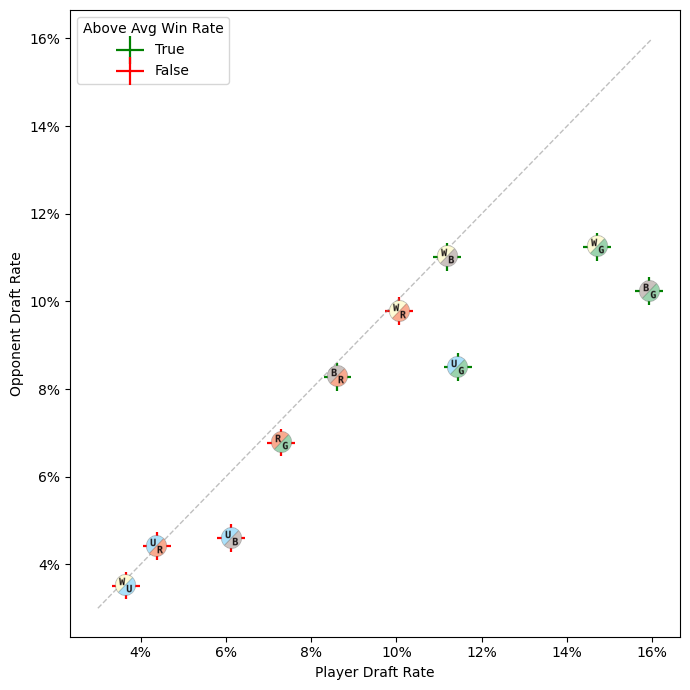

In [30]:
# | label: fig-player-vs-opp-freq-2color
# | fig-cap: "Use Rate of Players vs Opponents in 2-Color Draft Decks"

plt.figure(figsize=(7, 7))
sns.scatterplot(
    data=opp_colors_filtered,
    x="use_rate",
    y="opp_use_rate",
    hue="Above Avg Win Rate",
    marker="+",
    hue_order=[True, False],
    palette={True: "green", False: "red"},
    s=400,
)

plt.plot(
    [0.03, 0.16], [0.03, 0.16], color="gray", linestyle="--", linewidth=1, alpha=0.5
)

symbols.add_plot_symbols(
    data=opp_colors_filtered,
    x_col="use_rate",
    y_col="opp_use_rate",
    label_col="opp_colors",
    scale=0.04,
)

anno.set_labels_to_percent(axis="xy")
anno.set_axis_labels_and_show(xlabel="Player Draft Rate", ylabel="Opponent Draft Rate")

Looking at the non-2-color drafts in @fig-player-vs-opp-freq-non-2color, we observe that 17Lands players are far less likely to draft any color combination that isn’t a two-color deck. These non-2-color decks generally have lower win rates, with some exceptions in the mono White, Green, and Black decks.

This suggests that if a player is drafting mono White, Green, or Black, they may be better off staying mono rather than adding Blue or Red to create a two-color deck. However, since mono decks are drafted so infrequently, their strong performance might be circumstantial, depending on specific card combinations, and may not represent a consistent advantage across the entire color set.


In [31]:
mask = opp_colors["main_colors"].str.len() != 2
mask &= opp_colors["use_rate"] > 0.001
opp_colors_filtered = opp_colors.loc[mask]

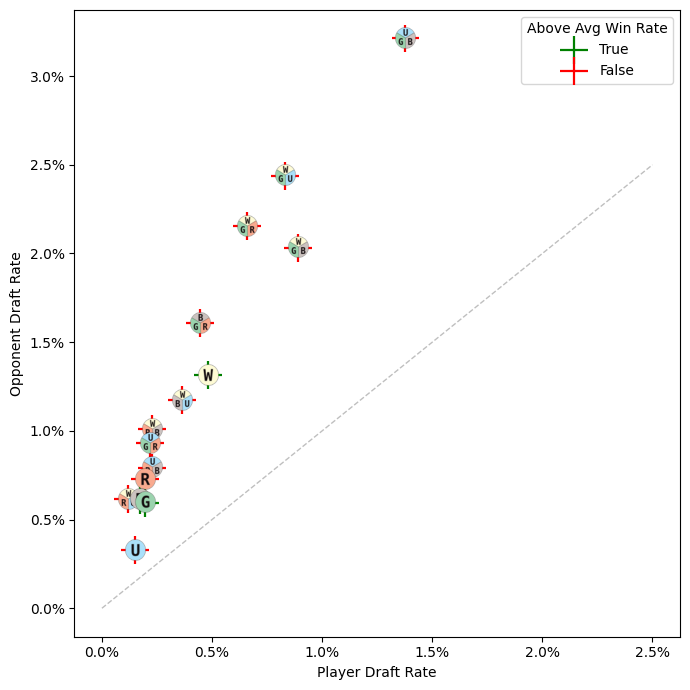

In [32]:
# | label: fig-player-vs-opp-freq-non-2color
# | fig-cap: "Use Rate of Players vs Opponents in 2-Color Draft Decks"

plt.figure(figsize=(7, 7))
sns.scatterplot(
    data=opp_colors_filtered,
    x="use_rate",
    y="opp_use_rate",
    hue="Above Avg Win Rate",
    marker="+",
    hue_order=[True, False],
    palette={True: "green", False: "red"},
    s=400,
)

plt.plot(
    [0.0, 0.025], [0.0, 0.025], color="gray", linestyle="--", linewidth=1, alpha=0.5
)

symbols.add_plot_symbols(
    data=opp_colors_filtered,
    x_col="use_rate",
    y_col="opp_use_rate",
    label_col="opp_colors",
    scale=0.04,
)

use_rate_mu = opp_colors_filtered["use_rate"].mean()
opp_use_rate_mu = opp_colors_filtered["opp_use_rate"].mean()

anno.set_labels_to_percent(axis="xy")
anno.set_axis_labels_and_show(xlabel="Player Draft Rate", ylabel="Opponent Draft Rate")

# Color Face-Offs (2-Color vs 2-Color)

Let’s now compare each pairing of the two-color decks in @fig-player-vs-opp-2color-freq-heat. This comparison provides insights into the strengths and weaknesses of individual decks.

We start by examining the number of games played between each pairing. The rows and columns are sorted by the maximum frequency of player deck pairings, with Black-Green (BG) vs. White-Green (WG) being the most frequent, followed by WG vs. WG matchups. The average number of games played between each pairing is 5,031.

As noted earlier, 17Lands players draft BG, WG, and Blue-Green (UG) decks more frequently than their opponents, while the other color pairs are used at near parity.


In [33]:
dual_colors = (
    df_draft.filter(
        pl.col("opp_colors").str.len_chars() == 2,
        pl.col("main_colors").str.len_chars() == 2,
        # pl.col("rank") == 'mythic',
    )
    .group_by(["opp_colors", "main_colors"])
    .agg(
        pl.col("n_games").sum(),
        pl.col("n_wins").sum(),
        pl.col("n_losses").sum(),
    )
    .sort(by="n_games", descending=True)
    .collect()
)
dual_colors = dual_colors.to_pandas()
dual_colors["win_rate"] = dual_colors["n_wins"] / dual_colors["n_games"]
dual_colors["loss_rate"] = dual_colors["n_losses"] / dual_colors["n_games"]
dual_colors = dual_colors.sort_values("win_rate", ascending=False).reset_index(
    drop=True
)

dual_matrix = dual_colors.pivot(
    index="main_colors", columns="opp_colors", values="n_games"
)

means = dual_matrix.max(axis=1).sort_values(ascending=False)
dual_matrix = dual_matrix.loc[means.index, means.index]
pair_mean = dual_matrix.mean().mean()

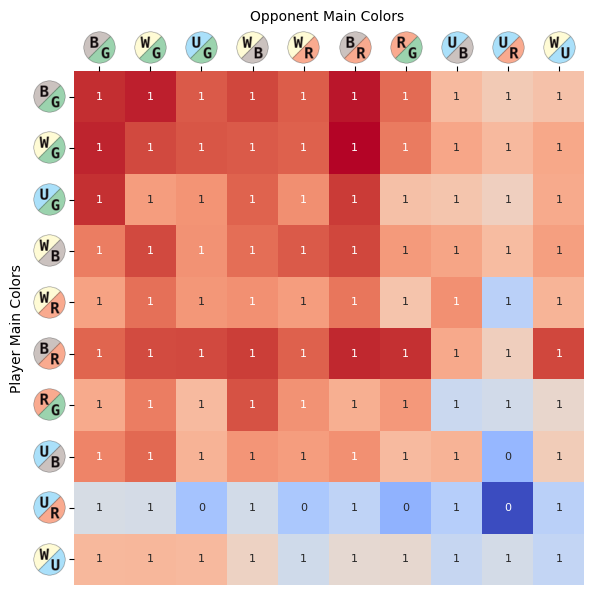

In [78]:
# | label: fig-player-vs-opp-2color-freq-heat
# | fig-cap: "Use Rate of Players vs Opponents in 2-Color Draft Decks"

plt.figure(figsize=(6, 6))
sns.heatmap(
    dual_matrix,
    annot=True,
    fmt=",.0f",
    cmap="coolwarm",
    cbar=False,
    annot_kws={"fontsize": 8},
)

symbols.add_heatmap_symbols()
anno.set_axis_labels_and_show(
    xlabel="Opponent Main Colors ", ylabel="Player Main Colors"
)

Next, we examine the pair-wise win rates for players in @fig-player-vs-opp-2color-wins-heat.

The most notable observation is that the 17Lands player base performs well in most matchups, with a significant exception for the Blue-Red (UR) deck. On average, UR matchups underperform by about 4 percentage points compared to similar matchups. Notably, the UR vs. UR matchup is exceptionally low and is the only like-paired matchup with win rates below 50%, indicating less than even odds of winning.


In [35]:
dual_matrix = dual_colors.pivot(
    index="main_colors", columns="opp_colors", values="win_rate"
)

dual_matrix = dual_matrix.loc[means.index, means.index]

pair_mean = dual_matrix.mean().mean()

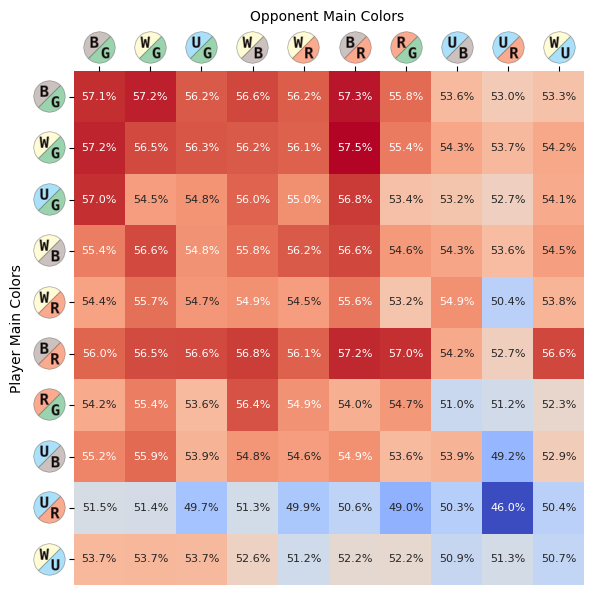

In [36]:
# | label: fig-player-vs-opp-2color-wins-heat
# | fig-cap: "Win Rate of Players vs Opponents in 2-Color Draft Decks"

plt.figure(figsize=(6, 6))
sns.heatmap(
    dual_matrix,
    annot=True,
    fmt=".1%",
    cmap="coolwarm",
    cbar=False,
    annot_kws={"fontsize": 8},
)

symbols.add_heatmap_symbols()
anno.set_axis_labels_and_show(
    xlabel="Opponent Main Colors ", ylabel="Player Main Colors"
)

# Color Splash

Splash colors are 1-3 non-land spell cards of a given color that enhance a deck without significantly diluting its main colors. These splash cards are often very powerful and can provide strategic advantages.

In @fig-n-color-splash-freq, we can see how frequently splashing occurs across different decks.


In [37]:
splash = (
    df_draft.group_by("splash_colors")
    .agg(
        pl.col("n_games").count().alias("len"),
        pl.col("n_wins").sum(),
        pl.col("n_games").sum(),
    )
    .sort(by="len", descending=True)
    .collect()
    .to_pandas()
)

splash["splash_colors"] = splash["splash_colors"].fillna("")
splash["Number of Splash Colors"] = splash["splash_colors"].str.len()
splash["splash_colors"] = splash["splash_colors"].replace({"": "None"})
splash["pct_splash"] = splash["len"] / splash["len"].sum()
splash = splash.sort_values(["Number of Splash Colors", "len"], ascending=[True, False])

splash_ct = (
    splash.groupby("Number of Splash Colors")
    .sum()
    .reset_index(drop=False)
    .sort_values(["Number of Splash Colors"], ascending=[True])
)

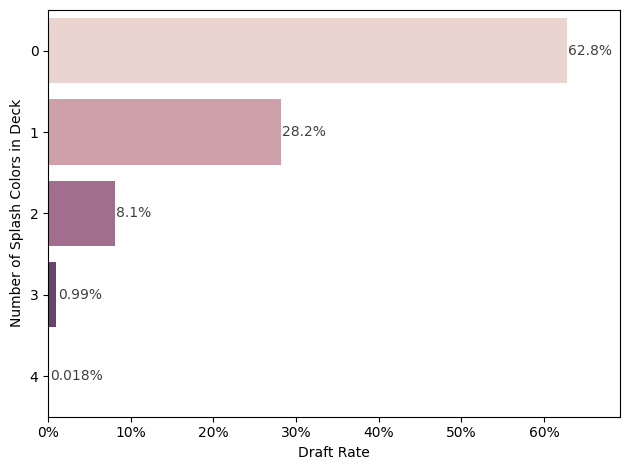

In [38]:
# | label: fig-n-color-splash-freq
# | fig-cap: "The frequency of splash colors."

sns.barplot(
    data=splash_ct,
    x="pct_splash",
    y="Number of Splash Colors",
    hue="Number of Splash Colors",
    orient="h",
    legend=False,
)

anno.annotate_bars()
anno.set_labels_to_percent()
anno.set_axis_labels_and_show(
    xlabel="Draft Rate", ylabel="Number of Splash Colors in Deck"
)

In @fig-component-splash-freq, we observe the frequency of splashing for each color. Blue is the most commonly splashed color, while Green is the least common.


In [39]:
splash_1 = splash.loc[splash["Number of Splash Colors"] == 1]

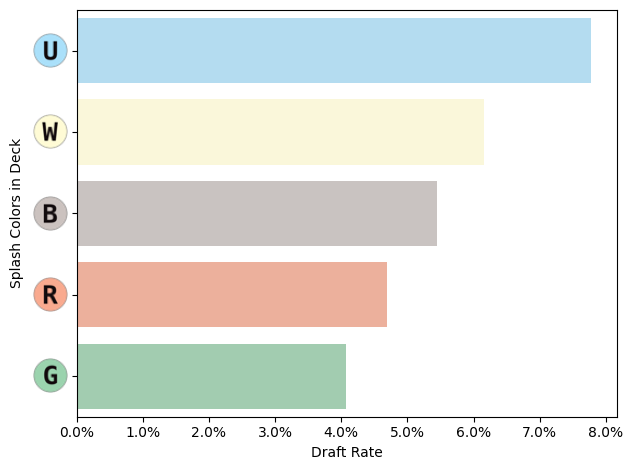

In [40]:
# | label: fig-component-splash-freq
# | fig-cap: "The rate at which the drafted deck contains a given splash color."

sns.barplot(
    data=splash_1,
    x="pct_splash",
    y="splash_colors",
    hue="splash_colors",
    palette=color_palette,
)

symbols.add_tick_symbols(scale=0.5)
anno.set_labels_to_percent()
anno.set_axis_labels_and_show(xlabel="Draft Rate", ylabel="Splash Colors in Deck")

# Player Rank


To assess player skill, I plotted the number of wins by player rank. While I don’t have player IDs to track individual performance, this view provides an average performance snapshot of the player base. Additionally, since I cannot track the number of drafts per player, more frequent players will be over-represented in the data.

Although opponent rankings are not available, we can infer that most opponents are of similar rank due to Arena’s draft system, which matches players with similar records. Each ranked season lasts about a month, and ranks experience "rank decay" between seasons. This decay means that at the start of a new season, a player's rank is lower, requiring them to play more games to regain their previous standing.

Therefore, our snapshot of each rank includes a mix of lower-skill players who have reached their peak at the end of the season and higher-skill players at the start of the season who are climbing back up the ranks.

In @fig-rank-games we see that most drafts are played by players in the Platinum ranks.


In [41]:
draft_rank = (
    df_draft.group_by("rank")
    .agg(
        pl.col("n_wins").len().alias("len"),
        pl.col("n_wins").sum(),
        pl.col("n_games").sum(),
    )
    .sort(by="n_wins", descending=True)
)

ordered_ranks = {
    0: "bronze",
    1: "silver",
    2: "gold",
    3: "platinum",
    4: "diamond",
    5: "mythic",
}

ordered_ranks_df = pl.LazyFrame(
    {"rank_value": list(ordered_ranks.keys()), "rank": list(ordered_ranks.values())}
).with_columns(
    # Create the rank_name column
    (pl.col("rank_value").cast(str) + " " + pl.col("rank").str.to_uppercase()).alias(
        "rank_name"
    )
)

ranks = (
    ordered_ranks_df.join(draft_rank, on="rank", how="left")
    .sort("rank_value")
    .collect()  # Execute the lazy frame
).to_pandas()

ranks["win_rate"] = ranks["n_wins"] / ranks["n_games"]

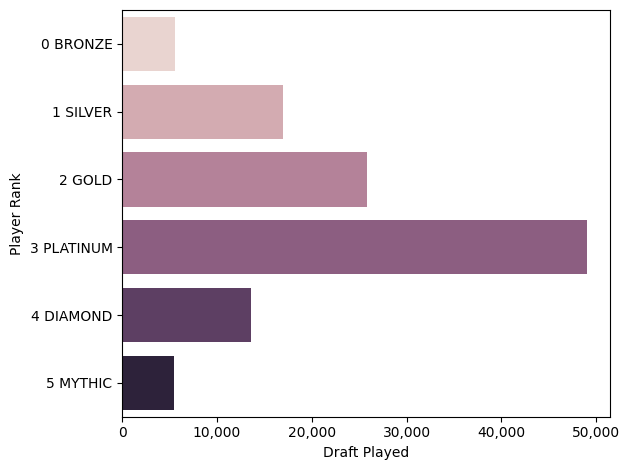

In [42]:
# | label: fig-rank-games
# | fig-cap: "Drafts Played by Players of Different Ranks."

sns.barplot(data=ranks, y="rank_name", x="len", hue="rank_value", legend=False)
anno.set_labels_to_commas()
anno.set_axis_labels_and_show(xlabel="Draft Played", ylabel="Player Rank")

In @fig-ranks-win-rate, we observe that win rates vary by rank, with higher ranks generally achieving higher win rates. The Bronze rank has by far the lowest win rate, reflecting new or less skilled players. Interestingly, the Silver rank shows the highest win rate, likely due to the influx of Gold and Platinum players who reset to Silver at the start of the season and quickly climb back up the ranks.


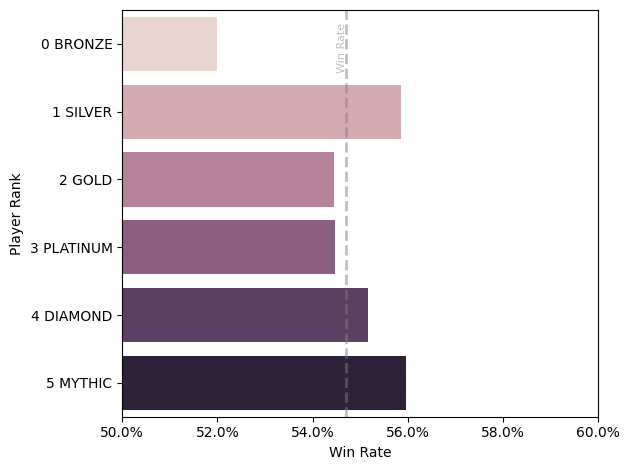

In [43]:
# | label: fig-ranks-win-rate
# | fig-cap: "Win Rate by Players of Different Ranks."

sns.barplot(data=ranks, y="rank_name", x="win_rate", hue="rank_value", legend=False)
plt.gca().set(xlim=(0.5, 0.60))

anno.plot_vert_line(x=mean_win_rate, label="Win Rate", y_pos=0.01, offset=-0.01)
anno.set_labels_to_percent()
anno.set_axis_labels_and_show(xlabel="Win Rate", ylabel="Player Rank")

For each rank, I plotted the win rate for the last week of play compared to the earlier timeframe. In @fig-ranked-win-rate-over-time, we see a decline in win rates for higher ranks but an increase in win rates for lower ranks. This pattern suggests that higher ranks may become more competitive as the season progresses, while lower ranks tend to become more casual.


In [44]:
draft_rank = (
    df_draft.with_columns(
        (pl.col("draft_time") > pd.to_datetime("2024-08-13")).alias("last_week")
    )
    .group_by(["rank", "last_week"])
    .agg(
        pl.col("n_wins").len().alias("len"),
        pl.col("n_wins").sum(),
        pl.col("n_games").sum(),
    )
    .sort(by="n_wins", descending=True)
)


week_ranks = (
    ordered_ranks_df.join(draft_rank, on="rank", how="left")
    .sort("rank_value")
    .collect()  # Execute the lazy frame
).to_pandas()

week_ranks["win_rate"] = week_ranks["n_wins"] / week_ranks["n_games"]

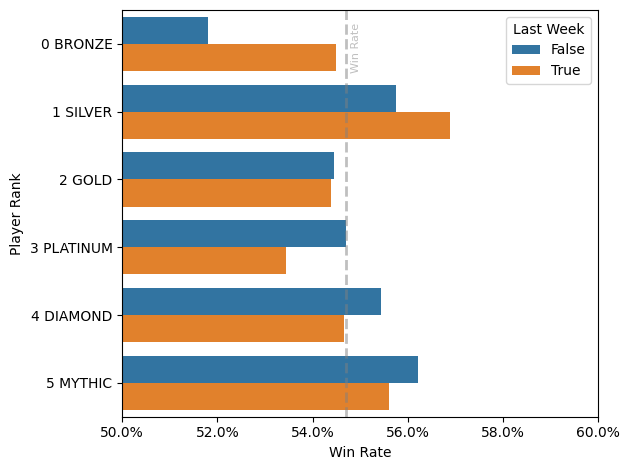

In [45]:
# | label: fig-ranked-win-rate-over-time
# | fig-cap: "Win Rate by Players of Different Ranks by Timeframe."

sns.barplot(data=week_ranks, y="rank_name", x="win_rate", hue="last_week")
plt.gca().set(xlim=(0.5, 0.60))

anno.plot_vert_line(x=mean_win_rate, label="Win Rate", y_pos=0.01, offset=0.02)
anno.set_labels_to_percent()
anno.set_axis_labels_and_show(
    xlabel="Win Rate",
    ylabel="Player Rank",
    legend=True,
    legend_title="Last Week",
)

@fig-ranked-n-games shows the number of games played per draft for each rank. While not identical, the pattern closely mirrors the previous chart of win rates.


In [46]:
ranks["games_per_draft"] = ranks["n_games"] / ranks["len"]
mean_games_played = df_draft.select(pl.col("n_games").mean()).collect().to_numpy()[0][0]

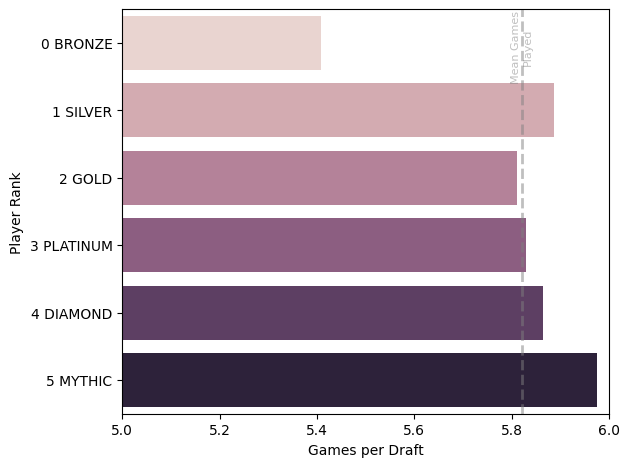

In [47]:
# | label: fig-ranked-n-games
# | fig-cap: "Games Played per Draft by Players of Different Ranks."

sns.barplot(
    data=ranks, y="rank_name", x="games_per_draft", hue="rank_value", legend=False
)
plt.gca().set(xlim=(5, 6))

anno.plot_vert_line(
    x=mean_games_played, label="Mean Games\nPlayed", y_pos=0.01, offset=0.0
)
anno.set_axis_labels_and_show(xlabel="Games per Draft", ylabel="Player Rank")

## Ranks over Time


We then examine the number of drafts played at each rank over time in @fig-ranked-drafts-over-time. Since the BLB set was released two days before the season start, I truncated the data at 08-01 to avoid the effects of rank decay.

The initial days are chaotic, with the BLB set launching on 07-30, and 07-31 being the first full day of recorded games. On 08-01, the new ranked season began, causing rank decay, which is especially noticeable in Mythic and Diamond gameplay.

Starting on 08-01, we observe distinct patterns: Gold rapidly declines after an initial peak of 3,800 drafts per day. Platinum peaks during days 4-6 before dropping. Diamond shows a slower climb with a plateau between days 8-13, followed by a gradual decline. Mythic starts at zero and slowly climbs, reaching a peak of 500 drafts per day around days 13-16.

From this chart, it's unclear how much of the decline at each rank is due to player advancement versus a loss of interest after the initial excitement of a new season. In the following charts, I will normalize the data to the total drafts played to better account for the overall decrease in gameplay.


In [48]:
rank_time_df = (
    df_draft.group_by(
        pl.col("draft_time").dt.truncate("1d")  # Truncate datetime to day
    )
    .agg(
        [
            pl.col("rank")
            .value_counts()
            .alias("rank_counts")  # Count occurrences of each rank
        ]
    )
    .explode("rank_counts")
    .with_columns(
        # Extract rank and count from the exploded struct
        pl.col("rank_counts").struct.field("rank").alias("rank"),
        pl.col("rank_counts").struct.field("count").alias("count"),
    )
    .drop("rank_counts")
    .join(ordered_ranks_df, on="rank", how="left")
    .sort(by=["draft_time", "rank_name"], descending=False)
    .collect()
    .to_pandas()
)

In [49]:
print(
    f"Total Time Interval: {(rank_time_df['draft_time'].max() - rank_time_df['draft_time'].min())}"
)

Total Time Interval: 19 days 00:00:00


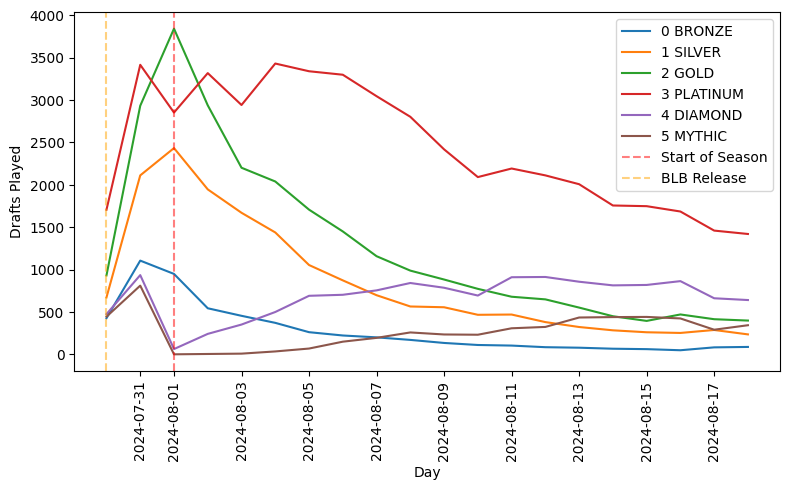

In [50]:
# | label: fig-ranked-drafts-over-time
# | fig-cap: "Drafts Played by Players Over Time, by Player rank."

plt.figure(figsize=(8, 5))
sns.lineplot(data=rank_time_df, x="draft_time", y="count", hue="rank_name")

plt.axvline(
    x=pd.to_datetime("2024-08-01"),
    color="red",
    linestyle="--",
    label="Start of Season",
    alpha=0.5,
)
plt.axvline(
    x=pd.to_datetime("2024-07-30"),
    color="orange",
    linestyle="--",
    label="BLB Release",
    alpha=0.5,
)
anno.set_axis_labels_and_show(
    xlabel="Day", ylabel="Drafts Played", legend=True, rot_x=True
)

In @fig-ranked-total-drafts-over-time, we see the number of drafts played over time. It's notable that the release of BLB and the start of the new season coincided, driving high player interest, with a peak of 11,300 drafts on 07-31. The rate of play decayed over the weeks, reaching a low of 3,100 on 08-17.

The decline is nearly monotonic, with slight increases on the Saturdays of 08-04 and 08-11, indicating that weekly seasonality has only a minor impact.

Releasing new sets clearly boosts player engagement. However, the introduction of the new season on 08-01 does not appear to have significantly increased play, though this observation is tentative. This data highlights the economic motivation for releasing new sets to drive digital engagement on Arena, and it’s likely that paper play would follow a similar trend, with increased draft activity consuming more booster packs in the weeks following a new set’s launch.

It would be valuable to compare this pattern across different set releases to better understand the player base’s set-by-set preferences.


In [51]:
rank_time_sum = (
    rank_time_df[["draft_time", "count"]].groupby(["draft_time"]).sum().reset_index()
)

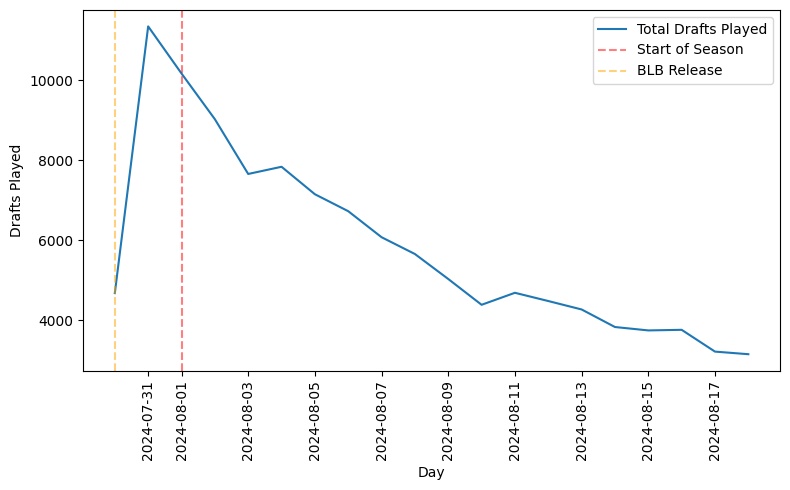

In [52]:
# | label: fig-ranked-total-drafts-over-time
# | fig-cap: "Total Drafts Played by Players Over Time."

plt.figure(figsize=(8, 5))
sns.lineplot(data=rank_time_sum, x="draft_time", y="count", label="Total Drafts Played")

plt.xlim = (pd.to_datetime("2024-07-29"), rank_time_sum["draft_time"].max())
plt.ylim = (0, 12000)

plt.axvline(
    x=pd.to_datetime("2024-08-01"),
    color="red",
    linestyle="--",
    label="Start of Season",
    alpha=0.5,
)
plt.axvline(
    x=pd.to_datetime("2024-07-30"),
    color="orange",
    linestyle="--",
    label="BLB Release",
    alpha=0.5,
)

anno.set_axis_labels_and_show(
    xlabel="Day", ylabel="Drafts Played", legend=True, rot_x=True
)

Next, we normalize for the total games played to observe the relative ranked play across the player base, as shown in @fig-normalized-ranked-drafts-over-time.

This normalization highlights the relative activity at each rank more clearly. After the season starts, Gold exhibits a linear decay as players progress to Platinum. Platinum maintains a prolonged plateau, indicating a balance between new players entering the rank and existing players advancing.

Diamond and Mythic both start with minimal participation but gradually increase in play almost monotonically, albeit at different rates.


In [53]:
rank_time_df2 = rank_time_df.merge(
    rank_time_sum, on="draft_time", suffixes=("", "_sum")
)
rank_time_df2["rank_pct"] = rank_time_df2["count"] / rank_time_df2["count_sum"]

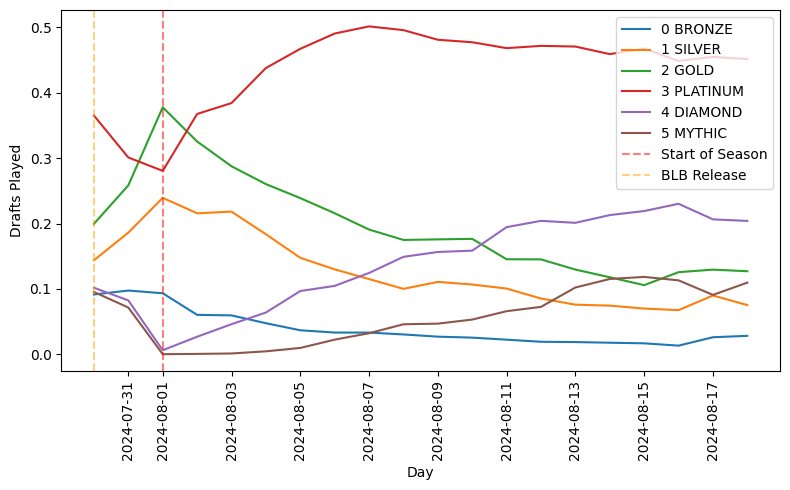

In [54]:
# | label: fig-normalized-ranked-drafts-over-time
# | fig-cap: "Normalized Drafts Played by Players of Different Ranks Over Time."

plt.figure(figsize=(8, 5))
sns.lineplot(data=rank_time_df2, x="draft_time", y="rank_pct", hue="rank_name")

plt.xlim = (pd.to_datetime("2024-07-29"), rank_time_sum["draft_time"].max())
plt.axvline(
    x=pd.to_datetime("2024-08-01"),
    color="red",
    linestyle="--",
    label="Start of Season",
    alpha=0.5,
)
plt.axvline(
    x=pd.to_datetime("2024-07-30"),
    color="orange",
    linestyle="--",
    label="BLB Release",
    alpha=0.5,
)

anno.set_axis_labels_and_show(
    xlabel="Day", ylabel="Drafts Played", legend=True, rot_x=True
)

## Low vs High Rank Players

Now, let's compare player rank performance against success by focusing on the three two-color decks that were outliers in the previous use-rate versus win-rate chart.

| Deck | Use Rate | Win Rate      |
| ---- | -------- | ------------- |
| BG   | High     | High          |
| BR   | Low      | High          |
| UR   | Very Low | Extremely Low |

In @fig-top-decks-by-rank, we analyze the overall performance of players using these decks, categorized by the week of play and whether the player is in the elite ranks of Diamond or Mythic.

For BG, the most played deck, performance across weeks and ranks shows no clear trend. However, for the BR and UR decks, which are less frequently played, players in both elite ranks demonstrated noticeable improvements in win rates from week one to week two. This suggests that the 17Lands player base adapted and learned to optimize these less favorable decks, regardless of their rank.

It's important to note that during the first week of play, the Mythic and Diamond player base is relatively small.


In [55]:
draft_rank_deck = (
    df_draft.with_columns(
        (
            (
                (pl.col("draft_time") - pd.to_datetime("2024-07-30"))
                / pd.Timedelta(days=7)
            ).cast(pl.Int64)
        ).alias("week"),
        (pl.col("rank").is_in(["mythic", "diamond"])).alias("elite_ranks"),
    )
    .filter(
        pl.col("main_colors").is_in(["BG", "BR", "UR"]),
    )
    .group_by(["rank", "main_colors", "week"])
    .agg(
        pl.col("n_wins").len().alias("len"),
        pl.col("n_wins").sum(),
        pl.col("n_games").sum(),
        pl.col("elite_ranks").first(),
    )
    .sort(by="n_wins", descending=True)
)

ranks_deck = (
    ordered_ranks_df.join(draft_rank_deck, on="rank", how="left")
    .sort("rank_value")
    .collect()  # Execute the lazy frame
).to_pandas()
ranks_deck["win_rate"] = ranks_deck["n_wins"] / ranks_deck["n_games"]

ranks_deck = ranks_deck.rename(
    columns={
        "elite_ranks": "Rank of Mythic or Diamond",
        "week": "Week of Play",
        "main_colors": "Player Deck Colors",
        "win_rate": "Player Win Rate",
    }
)

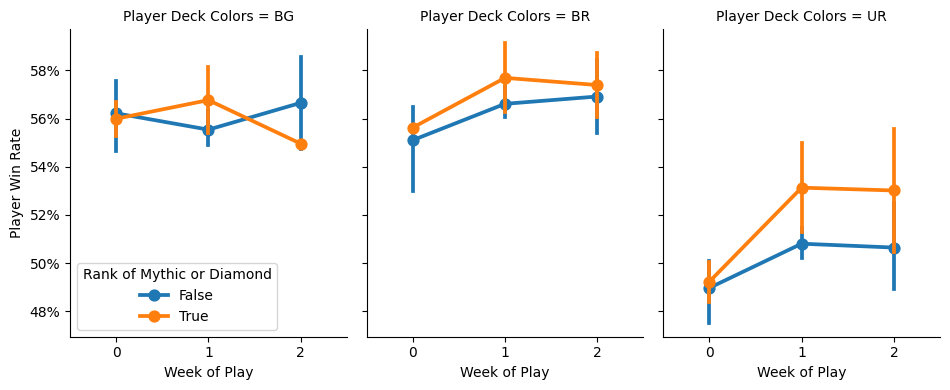

In [56]:
# | label: fig-top-decks-by-rank
# | fig-cap: "Win Rate for given color decks for top-ranked players vs others."

sns.catplot(
    data=ranks_deck,
    x="Week of Play",
    y="Player Win Rate",
    hue="Rank of Mythic or Diamond",
    kind="point",
    col="Player Deck Colors",
    height=4,
    aspect=0.8,
    legend_out=False,
)

anno.set_labels_to_percent(axis="y")
anno.set_axis_labels_and_show()

# Mulligans


Mulligans are a crucial strategy in MTG. If a player's starting hand is not ideal, they can draw a new one, each time with one fewer card. This process can be repeated as needed, creating a challenging trade-off between a poor hand and a smaller one.

In @fig-mulligan-distro, we observe the distribution of mulligans by the number of re-draws. Most players do not take a mulligan; about 12% take one mulligan, and 2% take two. Very few players take three or more mulligans, with only two instances of a player taking five mulligans, resulting in a starting hand of just two cards.

We also see that 17Lands players are slightly less likely to take mulligans compared to their opponents, likely due to a combination of superior deck construction and more informed mulligan decisions.


In [57]:
df_games = pl.scan_parquet(game_file)

sum_df = df_summary.collect().to_pandas()
mean_mulligan_rate = (sum_df["n_mul"] / sum_df["n_games"]).values[0]

df_mul = df_games.unpivot(
    index=["num_mulligans"],
    on=["num_mulligans", "opp_num_mulligans"],
    variable_name="Player",
    value_name="mulligan_count",
)


df_mul2 = df_mul.collect().to_pandas()

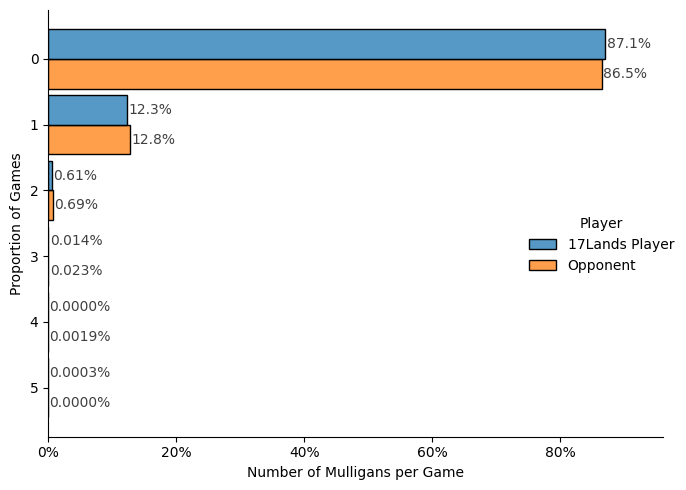

In [58]:
# | label: fig-mulligan-distro
# | fig-cap: "Distribution of Mulligans."


g = sns.displot(
    data=df_mul2,
    y="mulligan_count",
    hue="Player",
    multiple="dodge",
    stat="proportion",
    common_norm=False,
    discrete=True,
    shrink=0.9,
    element="bars",
)

anno.set_labels_to_percent()
anno.annotate_bars()
anno.set_axis_labels_and_show(
    xlabel="Number of Mulligans per Game",
    ylabel="Proportion of Games",
    reverse_y=True,
    legend=g._legend,
    legend_labels={
        "num_mulligans": "17Lands Player",
        "opp_num_mulligans": "Opponent",
    },
)

A side note on probability distributions: the player mulligan distributions appear to resemble Poisson distributions, with the number of mulligans taken being a discrete event.

Using the mean number of mulligans per game, 0.136, I performed random sampling from a Poisson distribution with $\lambda=0.136$. The results, shown in @fig-mulligan-poisson, closely match the actual data, though the real data shows a slightly higher number of games with one mulligan and slightly fewer for other values.

We can further investigate this pattern when we explore the card data to identify random draw events that correlate with mulligan decisions, such as the number of lands in the starting hand.


In [59]:
n_games = df_games.collect().shape[0]

df_games = df_games.with_columns(
    pl.Series(np.random.poisson(lam=mean_mulligan_rate, size=n_games)).alias(
        "sampled_mul"
    )
)

df_mul_sample = df_games.unpivot(
    index=["draft_id"],
    on=["num_mulligans", "sampled_mul"],
    variable_name="Distribution",
    value_name="mulligan_count",
)


df_mul_sample = df_mul_sample.collect().to_pandas()

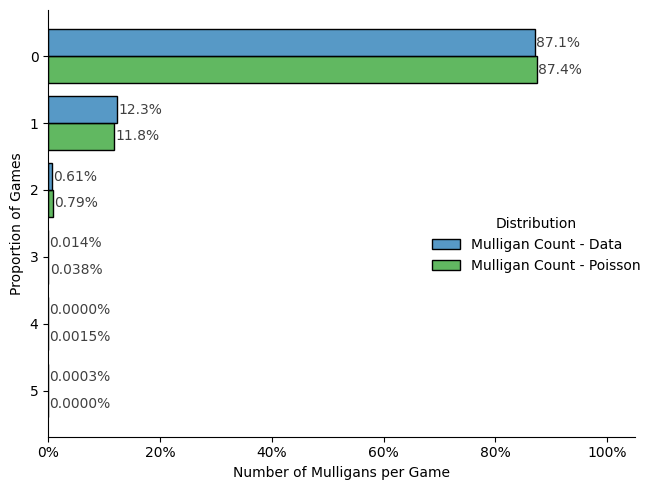

In [60]:
# | label: fig-mulligan-poisson
# | fig-cap: "Distribution of Player Mulligans vs Poisson Distribution."

custom_palette = {
    "num_mulligans": "#1f77b4",
    "sampled_mul": "#2ca02c",
}

g = sns.displot(
    data=df_mul_sample,
    y="mulligan_count",
    hue="Distribution",
    multiple="dodge",
    stat="proportion",
    common_norm=False,
    discrete=True,
    shrink=0.8,
    element="bars",
    palette=custom_palette,
)

plt.gca().set(xlim=(0, 1))
anno.set_labels_to_percent()
anno.annotate_bars()
anno.set_axis_labels_and_show(
    xlabel="Number of Mulligans per Game",
    ylabel="Proportion of Games",
    reverse_y=True,
    legend=g._legend,
    legend_labels={
        "num_mulligans": "Mulligan Count - Data",
        "sampled_mul": "Mulligan Count - Poisson",
    },
)

We now examine the outcomes of games where mulligans occur. In @fig-player-vs-opponent-mulligan-wins, we see a clear near-linear relationship between the number of mulligans and win rates, with win rates decreasing by approximately 15% for each mulligan taken.

When comparing 17Lands players to their opponents, the rate of win decay is consistent, maintaining an 8-9% gap in favor of 17Lands players at each mulligan level.

This data does not reveal the causal relationship between mulligans and win rates. It’s unclear whether mulligans are inherently detrimental or simply indicative of bad starting hands that would have had an even lower probability of winning. This question could be further explored using card data to assess the quality of starting hands that led to mulligans.


In [61]:
df_mul_win = (
    df_games.group_by(["num_mulligans"])
    .agg(
        pl.col("won").count().alias("n_games"),
        pl.col("won").sum().alias("n_wins"),
        pl.col("won").mean().alias("win_rate"),
    )
    .with_columns((pl.col("n_games") / pl.col("n_games").sum()).alias("pct_games"))
    .sort(by="num_mulligans", descending=False)
    .collect()
).to_pandas()

df_mul_win_opp = (
    df_games.with_columns((1 - pl.col("won")).alias("opp_won"))
    .group_by(["opp_num_mulligans"])
    .agg(
        pl.col("opp_won").count().alias("n_games"),
        pl.col("opp_won").sum().alias("n_wins"),
        pl.col("opp_won").mean().alias("win_rate"),
    )
    .with_columns((pl.col("n_games") / pl.col("n_games").sum()).alias("pct_games"))
    .sort(by="opp_num_mulligans", descending=False)
    .collect()
).to_pandas()

df_mul_win = df_mul_win.merge(
    df_mul_win_opp,
    left_on="num_mulligans",
    right_on="opp_num_mulligans",
    suffixes=("", "_opp"),
)

df_mul_win_m = df_mul_win.melt(
    id_vars=["num_mulligans"],
    value_vars=["win_rate", "win_rate_opp"],
    var_name="Player",
    value_name="Win Rate",
)

df_mul_win_m["Player"].replace(
    {"win_rate": "Player Win Rate", "win_rate_opp": "Opponent Win Rate"}, inplace=True
)

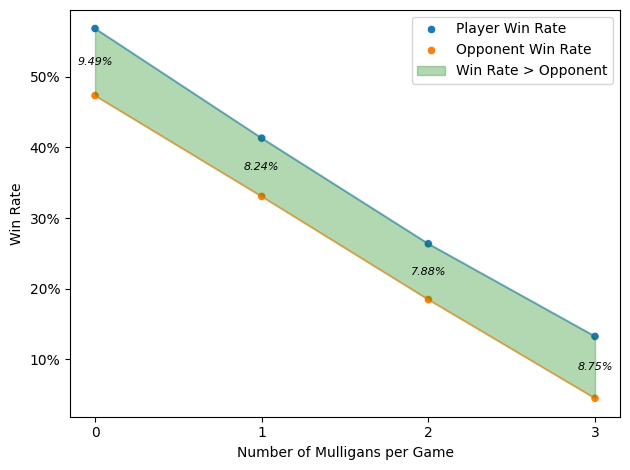

In [62]:
# | label: fig-player-vs-opponent-mulligan-wins
# | fig-cap: "Win Rates for Players and Opponents by Mulligans."

sns.scatterplot(data=df_mul_win_m, x="num_mulligans", y="Win Rate", hue="Player")
sns.lineplot(
    data=df_mul_win_m,
    x="num_mulligans",
    y="Win Rate",
    hue="Player",
    legend=False,
    alpha=0.5,
)

plt.fill_between(
    df_mul_win["num_mulligans"],
    df_mul_win["win_rate"],
    df_mul_win["win_rate_opp"],
    where=(df_mul_win["win_rate"] > df_mul_win["win_rate_opp"]),
    interpolate=True,
    color="green",
    alpha=0.3,
    label="Win Rate > Opponent",
)

for i, (x, y1, y2) in enumerate(
    zip(df_mul_win["num_mulligans"], df_mul_win["win_rate"], df_mul_win["win_rate_opp"])
):
    plt.text(
        x,
        (y1 + y2) / 2,
        f"{(y1 - y2):.2%}",
        ha="center",
        va="center",
        fontsize=8,
        fontstyle="italic",
    )

plt.ylim = (0, 0.6)
anno.set_labels_to_percent(axis="y")
anno.set_labels_to_ints(axis="x")
anno.set_axis_labels_and_show(
    xlabel="Number of Mulligans per Game",
    ylabel="Win Rate",
    legend=True,
)

To determine if mulligan success varies by player rank, I plotted the win rates for each rank in @fig-mulligan-win-rate-by-rank. The results show that win rates are very similar across all ranks, with no significant differences observed.


In [63]:
ranks = ["gold", "platinum", "diamond", "mythic"]

df_mul_win = (
    df_games.filter(pl.col("rank").is_in(ranks))
    .group_by(["num_mulligans", "rank"])
    .agg(
        pl.col("won").count().alias("n_games"),
        pl.col("won").sum().alias("n_wins"),
        pl.col("won").mean().alias("win_rate"),
    )
    .with_columns((pl.col("n_games") / pl.col("n_games").sum()).alias("pct_games"))
    .sort(by="num_mulligans", descending=False)
    .filter(
        pl.col("num_mulligans") < 3,
    )
    .collect()
).to_pandas()

df_mul_win["rank"].replace({rank: rank.title() for rank in ranks}, inplace=True)

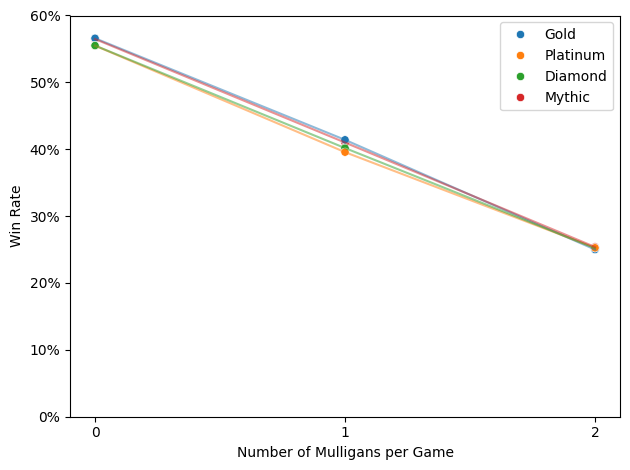

In [64]:
# | label: fig-mulligan-win-rate-by-rank
# | fig-cap: "Win Rates of Mulligans by Player Rank."

sns.scatterplot(
    data=df_mul_win,
    x="num_mulligans",
    y="win_rate",
    hue="rank",
    hue_order=[rank.title() for rank in ranks],
)
sns.lineplot(
    data=df_mul_win,
    x="num_mulligans",
    y="win_rate",
    hue="rank",
    hue_order=[rank.title() for rank in ranks],
    legend=False,
    alpha=0.5,
)

plt.gca().set(ylim=(0, 0.6))
anno.set_labels_to_percent(axis="y")
anno.set_labels_to_ints(axis="x")
anno.set_axis_labels_and_show(
    xlabel="Number of Mulligans per Game",
    ylabel="Win Rate",
    legend=True,
)

# Turn Counts

The number of turns in a game is an important metric for assessing the speed of a set. In @fig-turns-per-game, we see the distribution of turn counts for the Bloomburrow set, with an average of 8.9 turns per game.

Similar to the distribution seen in @fig-mulligan-poisson, this turn distribution appears to resemble a Poisson distribution.


In [65]:
turns = (
    df_games.group_by("num_turns")
    .agg(
        pl.col("won").mean().alias("win_rate"),
        pl.col("won").count().alias("n_games"),
    )
    .with_columns((pl.col("n_games") / pl.col("n_games").sum()).alias("pct_games"))
    .sort(by="num_turns", descending=True)
    .collect()
).to_pandas()
filtered_turns = turns.loc[turns["pct_games"] > 0.001]
mean_win_rate = df_games.select(pl.col("num_turns").mean()).collect().to_numpy()[0][0]

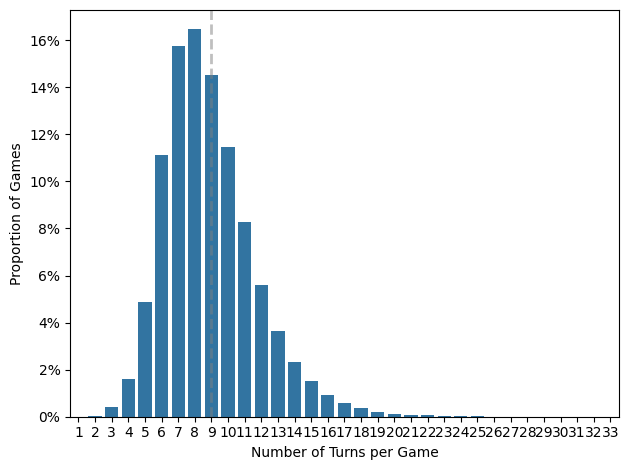

In [66]:
# | label: fig-turns-per-game
# | fig-cap: "The distribution of number of turns per game."

sns.barplot(data=turns, x="num_turns", y="pct_games")

anno.set_labels_to_percent(axis="y")
anno.plot_vert_line(x=8)
anno.set_axis_labels_and_show(
    xlabel="Number of Turns per Game",
    ylabel="Proportion of Games",
)

I'm also interested in how 17Lands players perform relative to the number of turns. In @fig-turns-wins, we observe that players are more likely to win games that end quickly. The win rate is 55-60% for games that conclude in fewer than 8 turns, dropping to 50-55% for games that last longer.


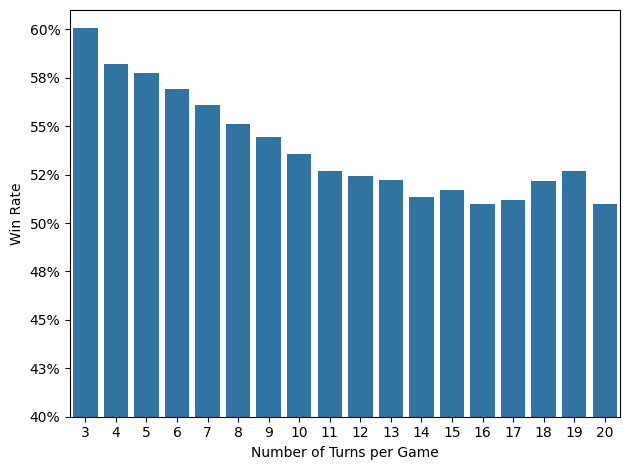

In [67]:
# | label: fig-turns-wins
# | fig-cap: "The win rate versus number of turns."

sns.barplot(data=filtered_turns, x="num_turns", y="win_rate")
plt.gca().set_ylim([0.4, 0.61])
anno.set_labels_to_percent(axis="y")
anno.set_axis_labels_and_show(
    xlabel="Number of Turns per Game",
    ylabel="Win Rate",
)

# Builds

A player can rebuild their deck between games by utilizing their sideboard during a draft session. I wanted to explore how often players rebuild their decks and whether this impacts win rate. This analysis focuses on premier draft, a best-of-one format, where there is less incentive to rebuild a deck compared to a best-of-three format.

In @fig-n-games-rebuilds, we see that over 75% of draft sessions use the same deck build throughout. Only a tiny fraction of sessions feature more than two different builds.


In [68]:
builds = (
    df_draft.group_by("n_builds")
    .agg(
        pl.col("n_wins").sum().alias("n_wins"),
        pl.col("n_games").sum().alias("n_games"),
    )
    .with_columns(
        (pl.col("n_wins") / pl.col("n_games")).alias("win_rate"),
        (pl.col("n_games") / pl.col("n_games").sum()).alias("pct_games"),
    )
    .sort(by="n_builds", descending=True)
    .collect()
).to_pandas()

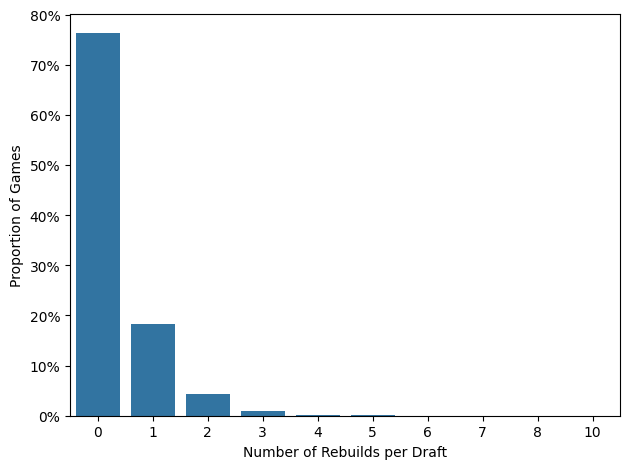

In [69]:
# | label: fig-n-games-rebuilds
# | fig-cap: "The proportion of games for the number of rebuilds."

sns.barplot(data=builds, x="n_builds", y="pct_games")
anno.set_labels_to_percent(axis="y")
anno.set_axis_labels_and_show(
    xlabel="Number of Rebuilds per Draft",
    ylabel="Proportion of Games",
)

In @fig-rebuilds-wins, we observe the relationship between win rate and the number of rebuilds. Decks with more rebuilds tend to have lower win rates, but it's unclear whether players are rebuilding more to salvage a poorly drafted deck or if rebuilding itself is a suboptimal strategy.


In [70]:
filter_builds = builds.loc[builds["pct_games"] > 0.005]

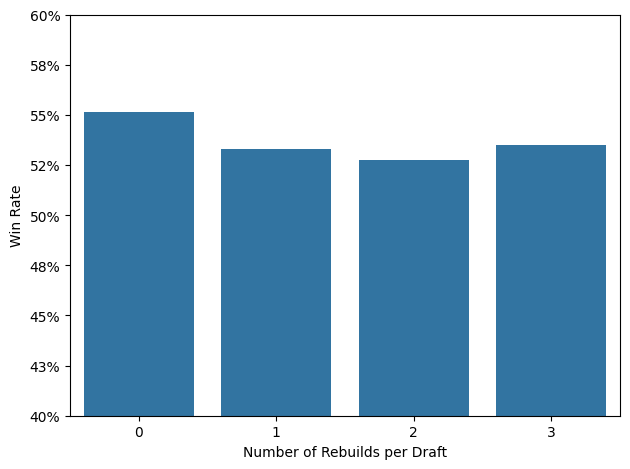

In [71]:
# | label: fig-rebuilds-wins
# | fig-cap: "The win rate for a number of deck rebuilds."

sns.barplot(data=filter_builds, x="n_builds", y="win_rate")
plt.gca().set_ylim([0.4, 0.6])
anno.set_labels_to_percent(axis="y")
anno.set_axis_labels_and_show(
    xlabel="Number of Rebuilds per Draft",
    ylabel="Win Rate",
)

# Starting Player

To assess the impact of going first or second, I plotted the win rates for each scenario. As shown in @fig-starting-win-rate, the win rate is significantly higher for the player who starts, with nearly a 7% advantage.


In [72]:
starting = (
    df_games.group_by("on_play")
    .agg(
        pl.col("won").sum().alias("n_wins"),
        pl.col("won").count().alias("n_games"),
    )
    .with_columns(
        (pl.col("n_wins") / pl.col("n_games")).alias("win_rate"),
        (pl.col("n_games") / pl.col("n_games").sum()).alias("pct_games"),
    )
    .sort(by="on_play", descending=True)
    .collect()
).to_pandas()

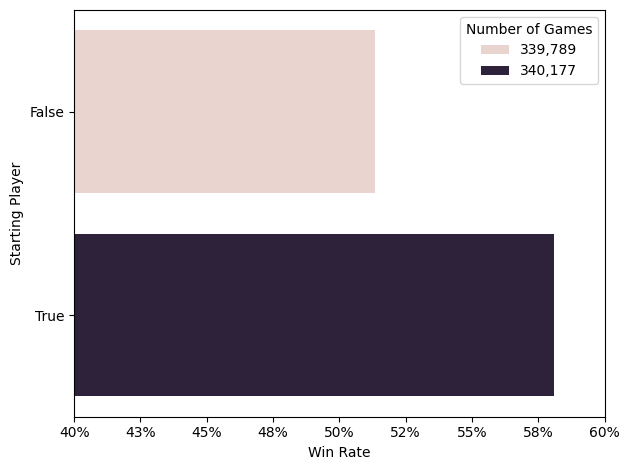

In [73]:
# | label: fig-starting-win-rate
# | fig-cap: "The win rate for starting versus non-starting player."


g = sns.barplot(
    data=starting,
    x="win_rate",
    y="on_play",
    hue="n_games",
    orient="h",
)
plt.gca().set(xlim=(0.40, 0.60))
anno.set_labels_to_percent()

anno.set_axis_labels_and_show(
    xlabel="Win Rate",
    ylabel="Starting Player",
    legend=True,
    legend_format=",.0f",
    legend_title="Number of Games",
)

# Conclusion

This analysis of the Bloomburrow draft data provides valuable insights into the dynamics of deck performance, player strategies, and overall gameplay within the set. Key findings include the strong influence of deck choice and mulligan decisions on win rates, the advantages of starting first, and the nuanced impact of rebuilding decks during draft sessions. We observed that players often align closely with expected use rates and win rates, but there are clear areas where player behavior diverges, such as the under-selection of high-performing but less popular decks like Black-Red.

The data suggests that set release timing, player rank progression, and strategic decisions such as mulligan frequency and rebuilding all play significant roles in shaping the draft meta. While certain trends, such as the consistent advantage of starting first, are clear, other factors like the impact of sideboarding and deck rebuilding require further exploration, particularly through a deeper analysis of card-level data.

Ultimately, understanding these patterns can help players refine their drafting and gameplay strategies, making more informed decisions to enhance their success in both digital and paper formats. Future work could focus on comparing these trends across different set releases to identify broader shifts in player behavior and preferences.
